## Demands



In [32]:
!pip install CFEDemands --upgrade
!pip install xarray
import cfe

Requirement already up-to-date: CFEDemands in /srv/app/venv/lib/python3.6/site-packages


An instance `r` of `cfe.Result` can be made persistent with
`r.to_dataset('my_result.ds')`, which saves the instance &ldquo;on disk&rdquo; in
[NetCDF format](https://en.wikipedia.org/wiki/NetCDF), and can be loaded using `cfe.from_dataset`.  We use
this method below to load data and demand system estimated for the
Tanzanian villages:



In [33]:
# Results can be made persistent by saving them, and then re-loading...
r = cfe.from_dataset('./TanzanianNPS/tanzanian_nps.ds')

print(r)
#if we want to save a result, we can do cfe.to_dataset("nameofdataset.ds")
#i is no. o fvariables 
#j is household
#k is household characteristics
#kp is also characteriris
#m is number of markets 
#t number of years

# concept of spatial arbitrage. have daughters marry sons in village B, so that there are 2 diff plots of resources
#open, standard way of storing dataset that has significant amount of scientific data

<xarray.Result>
Dimensions:           (i: 36, j: 13562, k: 8, kp: 8, m: 1, t: 4)
Coordinates:
  * j                 (j) object '0001-001' '0002-001' ... '905012325008102'
  * i                 (i) object 'Beef Including Minced Sausage' ... 'Yams/Cocoyams'
  * k                 (k) object 'C 0-2' 'C 2-5' 'C 6-9' ... 'Women' 'log HSize'
  * kp                (kp) object 'C 0-2' 'C 10-14' ... 'Women' 'log HSize'
  * t                 (t) int32 2008 2010 2012 2014
  * m                 (m) int32 1
Data variables:
    alpha             (i) float64 7.48 6.734 6.482 6.133 ... 4.978 5.052 6.358
    beta              (i) float64 1.213 1.286 1.002 1.239 ... 1.538 0.5749 0.806
    delta             (k, i) float64 ...
    prices            (i, t, m) float64 2.6e+03 3e+03 3.067e+03 ... 1.101 1.25
    characteristics   (k, j, t, m) float64 nan nan 0.0 nan ... nan 0.0 nan nan
    loglambdas        (j, t, m) float64 ...
    a                 (i, t, m) float64 ...
    yhat              float64 ...
    

Our focus earlier was on estimation, but the result `r` already has
encoded in it the results of that estimation.

There are parameters $\alpha$:

Alpha corresponds to level of demands. higher alpha = higher demand. lower alpha shift demand lower



In [34]:
r.get_alpha(as_df=True)

i
Beef Including Minced Sausage                               7.479798
Bottled/Canned Soft Drinks (Soda, Juice, Water)             6.734000
Bread                                                       6.482336
Buns, Cakes And Biscuits                                    6.133450
Cassava Fresh                                               6.026506
Chicken And Other Poultry                                   7.711807
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            5.681213
Coconuts (Mature/Immature)                                  6.467604
Cooking Bananas, Plantains                                  6.325288
Cooking Oil                                                 6.251762
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)          6.404280
Eggs                                                        6.462157
Fresh Fish And Seafood (Including Dagaa)                    6.792584
Fresh Milk                                                  6.475967
Goat Meat                       

Elasticity parameters $\beta$:
price elasticity with respect to demand of household resources.
$\beta$ are proportional to income elasticities.
What do $\beta$ mean? %change in Ceremonial expenses/% change of lambda  = $\beta$

In [35]:
#$\beta$ represent percentage change in a good divided by percentage change in lambda
betas = r.get_beta(as_df=True) 
betas.sort_values(ascending=False)

i
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)            1.724716
Mangoes, Avocadoes And Other Fruits                         1.705173
Onions, Tomatoes, Carrots And Green Pepper, Other Viungo    1.667830
Ripe Bananas                                                1.664325
Fresh Milk                                                  1.654788
Fresh Fish And Seafood (Including Dagaa)                    1.601109
Sweets                                                      1.537533
Spinach, Cabbage And Other Green Vegetables                 1.378659
Honey, Syrups, Jams, Marmalade, Jellies, Canned Fruits      1.368159
Cooking Oil                                                 1.286237
Bottled/Canned Soft Drinks (Soda, Juice, Water)             1.286109
Milk Products (Like Cream, Cheese, Yoghurt Etc)             1.275323
Buns, Cakes And Biscuits                                    1.239239
Beef Including Minced Sausage                               1.213233
Goat Meat                       

Parameters related to household characteristics $\delta$:

C is child,
B is boys,
G is girls,
M is men,
W is women

semi elasticties tells us the percentage change of demand of good X if there is one additional person of a certain age range.
The household size is the same, just subtracting proportion of other age range when we add proportion of one age range.
The numbers are all less than 1, tells us there is large return to scale of household production. 

In [36]:
deltas = r.delta.to_dataframe().unstack('k')
deltas

delta            \
k                                                      C 0-2   C 10-14   
i                                                                        
Beef Including Minced Sausage                      -0.073840 -0.009354   
Bottled/Canned Soft Drinks (Soda, Juice, Water)    -0.110171  0.011356   
Bread                                              -0.063439  0.061496   
Buns, Cakes And Biscuits                           -0.137101 -0.045781   
Cassava Fresh                                      -0.101534  0.058834   
Chicken And Other Poultry                          -0.084434 -0.001241   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.110621 -0.006674   
Coconuts (Mature/Immature)                          0.077160  0.034416   
Cooking Bananas, Plantains                         -0.119571  0.023085   
Cooking Oil                                        -0.077055 -0.011671   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.029089  0.057339   
Eggs                                               -0.129918 -0.028372   
Fresh Fish And Seafood (Including Dagaa)           -0.078255 -0.019806   
Fresh Milk                                         -0.011722 -0.042190   
Goat Meat                                          -0.038121  0.026644   
Groundnuts In Shell/Shelled                         0.018725  0.067784   
Honey, Syrups, Jams, Marmalade, Jellies, Canned... -0.092751 -0.036592   
Irish Potatoes                                     -0.046358 -0.001069   
Macaroni, Spaghetti                                 0.075484  0.111125   
Maize (Flour)                                      -0.058619  0.025145   
Mangoes, Avocadoes And Other Fruits                -0.153958 -0.081504   
Milk Products (Like Cream, Cheese, Yoghurt Etc)    -0.016043 -0.035447   
Millet And Sorghum (Flour)                         -0.048159  0.088875   
Onions, Tomatoes, Carrots And Green Pepper, Oth... -0.108622 -0.053861   
Other Spices                                       -0.085138 -0.052510   
Peas, Beans, Lentils And Other Pulses              -0.053746  0.059298   
Rice (Husked)                                      -0.082004  0.013674   
Ripe Bananas                                       -0.097796 -0.030588   
Salt                                                0.031451  0.034461   
Spinach, Cabbage And Other Green Vegetables        -0.122450 -0.025277   
Sugar                                              -0.040786  0.023971   
Sugarcane                                          -0.160332  0.028215   
Sweet Potatoes                                      0.024932  0.027570   
Sweets                                             -0.074007 -0.039619   
Tea Dry                                            -0.056301  0.008933   
Yams/Cocoyams                                       0.045950  0.043725   

                                                                        \
k                                                    C 15-17     C 2-5   
i                                                                        
Beef Including Minced Sausage                       0.049567 -0.065232   
Bottled/Canned Soft Drinks (Soda, Juice, Water)     0.063397 -0.104918   
Bread                                               0.110984  0.023626   
Buns, Cakes And Biscuits                            0.047703 -0.099702   
Cassava Fresh                                       0.042987  0.011338   
Chicken And Other Poultry                           0.067517 -0.050566   
Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)   -0.035268 -0.040138   
Coconuts (Mature/Immature)                          0.074361  0.052178   
Cooking Bananas, Plantains                          0.016822 -0.109062   
Cooking Oil                                         0.014011 -0.068993   
Dried/Salted/Canned Fish And Seafood (Incl. Dagaa)  0.037695 -0.004870   
Eggs                                                0.130577 -0.044665   
Fresh Fish And Seafood (Including Dagaa)            0.0232

The triple of paramters $(\alpha,\beta,\delta)$ completely describes
the demand system and the corresponding utility function (over the
goods we observe).



## Demands



As mentioned above, we&rsquo;ve estimated the parameters of a Frischian
demand system (demands that depend on prices and the households
marginal utility of expenditures).  But we can *compute* the
corresponding Marshallian (depends on prices and budget) or Hicksian
(depends on prices and the level of utility) demands for this same
population, using the `cfe.Result.demands` method.  

Let&rsquo;s compute Marshallian demands.  Start with a choice of budget $x$
and prices.  We&rsquo;ll use the earliest prices, from 2008, and focus on the
village as the market we&rsquo;re interested in



In [37]:
x = 10690 # Budget (assuming budget is 10,690 Tanzanian shillings)

p = r.prices.sel(t=2008,m=1).copy()   
# prices are the prices that were revealed in this village. P is a vector of prices.

p.to_dataframe().squeeze()

#numeric good. the numeric value of this good is implied to be 1. 
#parameters are fixed. 

,t,m,prices
i,,,
Beef Including Minced Sausage,2008,1,2600.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",2008,1,1.142857
Bread,2008,1,1.500000
"Buns, Cakes And Biscuits",2008,1,1.666667
Cassava Fresh,2008,1,5.000000
Chicken And Other Poultry,2008,1,6.000000
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",2008,1,0.666667
Coconuts (Mature/Immature),2008,1,0.681818
"Cooking Bananas, Plantains",2008,1,0.976190


Now compute demands.  The object `r` already knows what the estimated
parameters are, and uses those automatically:

set of prices is $p$.
$x$, represents budget, which is set to TZN 10690.


In [38]:
r.demands(x,p).sort_values(ascending=True) 
#x/p = pq/p = q

i
Beef Including Minced Sausage                                  0.069502
Fresh Milk                                                     0.076553
Goat Meat                                                      0.078046
Milk Products (Like Cream, Cheese, Yoghurt Etc)                0.098800
Irish Potatoes                                                 0.142722
Peas, Beans, Lentils And Other Pulses                          0.210354
Rice (Husked)                                                  0.212106
Millet And Sorghum (Flour)                                     0.456113
Eggs                                                           0.503373
Maize (Flour)                                                  0.906691
Salt                                                           1.666716
Sweets                                                         2.014343
Tea Dry                                                        2.160541
Cassava Fresh                                                 

In [39]:
r.demands(1, p, type = "Frischian").sort_values(ascending=True)

i
Beef Including Minced Sausage                                   0.627986
Goat Meat                                                       0.682227
Peas, Beans, Lentils And Other Pulses                           0.974565
Milk Products (Like Cream, Cheese, Yoghurt Etc)                 0.999148
Irish Potatoes                                                  1.029291
Maize (Flour)                                                   1.048816
Millet And Sorghum (Flour)                                      1.100167
Rice (Husked)                                                   1.304958
Fresh Milk                                                      1.541097
Salt                                                            2.213733
Eggs                                                            3.415093
Tea Dry                                                         6.130681
Cassava Fresh                                                  23.647528
Sweets                                           

In [40]:
r.demands(1, p, type = "Hicksian").sort_values(ascending=True)

i
Fresh Milk                                                   0.001477
Beef Including Minced Sausage                                0.003845
Goat Meat                                                    0.004510
Milk Products (Like Cream, Cheese, Yoghurt Etc)              0.004714
Irish Potatoes                                               0.010621
Rice (Husked)                                                0.019453
Peas, Beans, Lentils And Other Pulses                        0.028013
Eggs                                                         0.040594
Sweets                                                       0.051412
Millet And Sorghum (Flour)                                   0.143299
Tea Dry                                                      0.548210
Maize (Flour)                                                0.748686
Salt                                                         1.147552
Cassava Fresh                                                1.168146
Other Spices      

So we can compute demands.  Let&rsquo;s trace out a demand curve for different goods:



/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -5.12E+02.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[-1],i))
/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -1.25E-01.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[-1],i))
/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -3.05E-05.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[

Text(0, 0.5, 'Price')

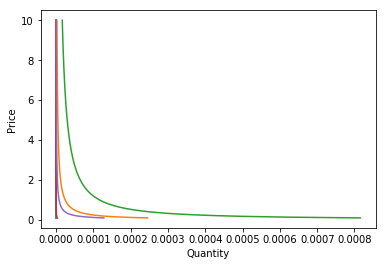

In [41]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,500)

def my_prices(p0, food, p=p):
    p.loc[food] = p0
    return p

for x in [10,20,40,80,160]:
    plt.plot([r.demands(x,my_prices(p0, 'Ripe Bananas'))['Ripe Bananas'] for p0 in P],P)
    plt.plot([r.demands(x,my_prices(p0, 'Bread'))['Bread'] for p0 in P],P)
    plt.plot([r.demands(x,my_prices(p0, 'Peas, Beans, Lentils And Other Pulses'))['Peas, Beans, Lentils And Other Pulses'] for p0 in P],P)
    plt.plot([r.demands(x,my_prices(p0, 'Spinach, Cabbage And Other Green Vegetables'))['Spinach, Cabbage And Other Green Vegetables'] for p0 in P],P)
    plt.plot([r.demands(x,my_prices(p0, 'Goat Meat'))['Goat Meat'] for p0 in P],P)
    

plt.xlabel('Quantity')
plt.ylabel('Price')

## Nutrition

In [42]:
x = 10690 # Budget

# Note selection of prices for 2008 for market 1
p = r.prices.sel(t=2008,m=1).copy()

p.to_dataframe().fillna(1).squeeze()

,t,m,prices
i,,,
Beef Including Minced Sausage,2008,1,2600.000000
"Bottled/Canned Soft Drinks (Soda, Juice, Water)",2008,1,1.142857
Bread,2008,1,1.500000
"Buns, Cakes And Biscuits",2008,1,1.666667
Cassava Fresh,2008,1,5.000000
Chicken And Other Poultry,2008,1,6.000000
"Citrus Fruits (Oranges, Lemon, Tangerines, Etc.)",2008,1,0.666667
Coconuts (Mature/Immature),2008,1,0.681818
"Cooking Bananas, Plantains",2008,1,0.976190


And with $(x,p)$ defined we can calculate example demands:



In [43]:
c=r.demands(x,p)
c.sort_values(ascending =True)

i
Beef Including Minced Sausage                                  0.069502
Fresh Milk                                                     0.076553
Goat Meat                                                      0.078046
Milk Products (Like Cream, Cheese, Yoghurt Etc)                0.098800
Irish Potatoes                                                 0.142722
Peas, Beans, Lentils And Other Pulses                          0.210354
Rice (Husked)                                                  0.212106
Millet And Sorghum (Flour)                                     0.456113
Eggs                                                           0.503373
Maize (Flour)                                                  0.906691
Salt                                                           1.666716
Sweets                                                         2.014343
Tea Dry                                                        2.160541
Cassava Fresh                                                 

Create a function to change a single price in vector p:

In [44]:
def my_prices(p0,p=p,i='Ripe Bananas'):
    p = p.copy()
    p.loc[i] = p0
    return p

## Mapping to Nutrients

We&rsquo;ve seen how to map prices and budgets into vectors of consumption
quantities using `cfe.Result.demands`.  Next we want to think about
how to map these into bundles of *nutrients*.  The information needed
for the mapping comes from a &ldquo;Food Conversion Table&rdquo; (or database,
such as the [USDA Nutrition DataBase](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md)).   Here we&rsquo;ve adapted (with
thanks to Alessandro Tarozzi of the Universitat Pompeu Fabra) a food
conversion table developed by Gopalan et al (1980) to the foods
reported in the Indian ICRISAT data:

In [45]:
import pandas as pd
fct = pd.read_pickle('./TanzanianNPS/fct.df')

# Change some labels
d={'protein g':'Protein',
   'energy kcal':'Calories',
   'ca mg':'Calcium',
   'fe mg':'Iron',
   'zn mg': 'Zinc',
   'mg mg': 'Magnesium',
   'vit a ug':'Vitamin A',
  'vit e ug':'Vitamin E',
  'vit c mg':"Vitamin C",
  'vit b6 mg':'Vitamin B6',
   'vit b12 ug':'Vitamin B12'}

fct = fct.rename(columns=d)[list(d.values())]
#fct.index = fct.index.droplevel('unit')
fct = fct.rename(index={'Bread, white':'Bread'})

We need the index of the Food Conversion Table (FCT) to match up with
the index of the vector of quantities demanded.   To manage this we
make use of the `align` method for `pd.DataFrames`:



In [46]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = fct.align(c,axis=0,join='inner')   #align method is taking object fct and a series of demand c to make an inter join of two things
print(fct0.index)

Index(['Bread', 'Sugar', 'Ripe Bananas', 'Sugarcane', 'Eggs', 'Salt'], dtype='object')


Now, since rows of `fct0` and `c0` match, we can obtain nutritional
outcomes from the inner (or dot, or matrix) product of the transposed
`fct0` and `c0`:

In [47]:
# The @ operator means matrix multiply
N = fct0.T@c0   #TRANSPOSE FOOD CONVERSION TABLE  AND MULTIPLIED BY VECTOR OF DEMANDS
N  # N is the vector of nutritions.

#this is for household. #nutritional requirements is individual.

Protein         1358.838860
Calories       89774.426810
Calcium         4995.581293
Iron             262.214340
Zinc             206.706788
Magnesium      21225.989987
Vitamin A       2527.113721
Vitamin E         71.652803
Vitamin C       6146.206968
Vitamin B6       282.785578
Vitamin B12        4.077320
dtype: float64

Of course, since we can compute the nutritional content of a vector of
consumption goods `c0`, we can also use our demand functions to
compute nutrition as a *function* of prices and budget.

In [48]:
def nutrient_demand(x,p):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

With this `nutrient_demand` function in hand, we can see how nutrient
outcomes vary with budget, given prices:


Text(0, 0.5, 'Log Nutrient')

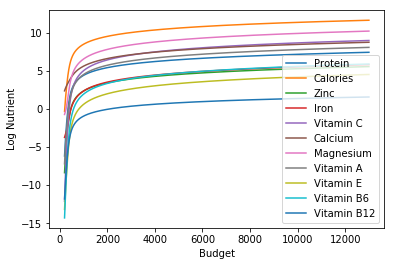

In [49]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(200,13000,2000)

UseNutrients = ['Protein','Calories','Zinc','Iron','Vitamin C','Calcium','Magnesium','Vitamin A','Vitamin E','Vitamin B6','Vitamin B12']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('Log Nutrient')

#engel curve for diff nutritions.

Nutritional Outcome

Text(0, 0.5, 'log nutrient')

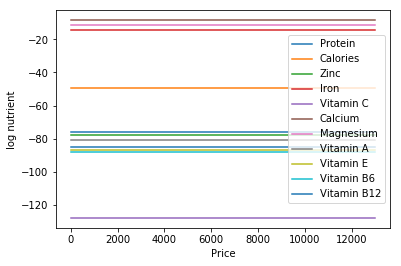

In [50]:
P = np.linspace(.1,13000,50)

x = p.loc["Mangoes, Avocadoes And Other Fruits"]

plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices(p0,i='Mangoes, Avocadoes And Other Fruits')))[UseNutrients] for p0 in P},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Price')
plt.ylabel('log nutrient')


#as price increases, nutritional outcome decreases.

## Nutritional requirements
Individuals have nutritional requirements established by nutrition
scientists.  Here are some standards established by the Tanzanian
National Institute of Nutrition:
### Nutritional needs of individuals



| Sex-Age|Calories|Protein|Fat|Calcium|Iron|Betacarotene|Thiamine|Riboflavin|Niacin|Ascorbic Acid|
|---|---|---|---|---|---|---|---|---|---|---|
| C 0-0.5||||500|||.2|.3||25|
| C 0.5-1|||19|500|5|2800|.3|.4||25|
| C 1-3|1060|16.7|27|600|9|3200|.5|.6|8|40|
| C 4-6|1350|20.1|25|600|13|3200|.7|.8|11|40|
| C 7-9|1690|29.5|30|600|16|4800|.8|1.|13|40|
| B 10-12|2190|39.9|35|800|21|4800|1.1|1.3|15|40|
| G 10-12|2010|40.4|35|800|27|4800|1.|1.2|13|40|
| B 13-15|2750|54.3|45|800|32|4800|1.4|1.6|16|40|
| G 13-15|2330|51.9|40|800|27|4800|1.2|1.4|14|40|
| B 16-17|3020|61.5|50|800|28|4800|1.5|1.8|17|40|
| G 16-17|2440|55.5|35|800|26|4800|1.|1.2|14|40|
| M|2730|60|30|600|17|4800|1.4|1.4|18|40|
| W|2230|55|25|1200|21|4800|1.1|1.3|14|40|



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For the average household in the Tanzanian villages, the number of
different kinds of people can be computed by averaging over households:

In [51]:
# In 2008, averaged over households and villages
zbar = r.z.sel(t=2008).mean(['j','m'])[:-1]
zbar.to_dataframe()

,t,z
k,,
C 0-2,2008,0.326060
C 2-5,2008,0.517497
C 6-9,2008,0.818444
C 10-14,2008,0.746398
C 15-17,2008,0.281186
Men,2008,1.247427
Women,2008,1.377110


Now, the inner/dot/matrix product between `zbar` and the `rda`.

DataFrame of requirements will give us 
Minimum nutrition requirements for the
average household:

In [52]:
rda = pd.read_pickle('TanzanianNPS/rda.df')
# This matrix product gives minimum nutrient requirements for average household in 2008
hh_rda = rda.replace('',0).T@zbar 
hh_rda

Calories       1.016464e+04
Protein        1.830525e+02
Vitamin A      2.511486e+06
Vitamin B6     6.411655e+00
Vitamin B12    1.108639e+01
Vitamin C      2.110791e+02
Vitamin D      2.657061e+01
Vitamin E      3.751133e+04
Calcium        4.896729e+03
Iron           5.835684e+01
Magnesium      8.947824e+02
Zinc           3.053372e+01
dtype: float64

## Nutritional Adequacy of Food Demands
Since we can trace out demands for nutrients as a function of $(x,p)$,
and we&rsquo;ve computed minimum nutritional requirements for the average
household, we can *normalize* nutritional intake to check the adequacy
of diet.


In [53]:
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda  #vector of total nutrients divide by minimum household rda(nutrition req)
#if more than one, adequate. # if less than one, not adequate.
nutrient_adequacy_ratio(x,p)*1000000


Calcium        4.069728e-02
Calories       2.725868e-20
Iron           7.588696e-03
Magnesium      9.898549e-03
Protein        6.217479e-30
Vitamin A      3.967424e-36
Vitamin B12    8.987715e-33
Vitamin B6     7.674397e-34
Vitamin C      1.400197e-52
Vitamin D               NaN
Vitamin E      6.558764e-37
Zinc           4.193343e-30
dtype: float64

In terms of normalized nutrients, any household with more than one
unit of any given nutrient (or zero in logs) will be consuming a
minimally adequate level of the nutrient; below this level there&rsquo;s
clearly nutritional inadequacy.  For this reason the ratio of
actual nutrients to required nutrients is termed the &ldquo;nutrient
adequacy ratio,&rdquo; or NAR.

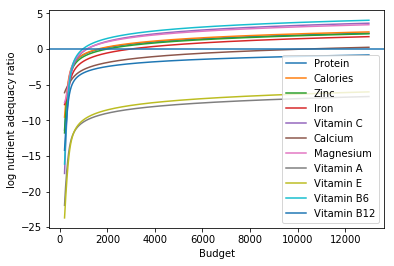

In [54]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

As before, we can also vary relative prices.  Here we trace out
nutritional adequacy varying the price of Mangoes, Avocadoes and Other Fruits:



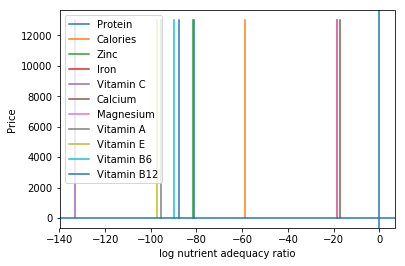

In [55]:
x = p.loc["Mangoes, Avocadoes And Other Fruits"]

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Mangoes, Avocadoes And Other Fruits')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i='Mangoes, Avocadoes And Other Fruits').values)

And varying the price of Ripe Bananas:

/srv/app/venv/lib/python3.6/site-packages/cfe/root_with_precision.py:85: UserWarning: Tolerance is set to 1.00E-12.  Change in value is -4.00E+00.  Iterations are 1001.  Perhaps tolerance is too high?
  warn("Tolerance is set to %.2E.  Change in value is %.2E.  Iterations are %d.  Perhaps tolerance is too high?" % (tol,x[0]-x[-1],i))


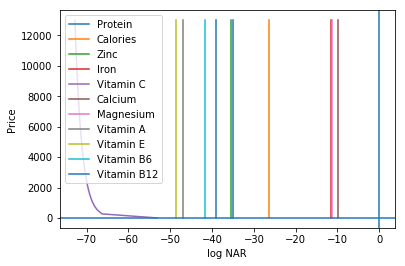

In [56]:
x = 30

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(x,my_prices(p0,i='Ripe Bananas')))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log NAR')
plt.axvline(0)
plt.axhline(p.sel(i='Ripe Bananas').values)

## Compensated Policy Experiments


Compare Marshallian (uncompensated) and Hicksian (compensated)
demands:

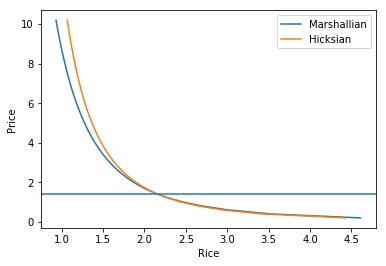

In [57]:
from costs_preface import *

USE_GOOD = 'Rice'
#USE_GOOD = 'Milk'

U0 = r.indirect_utility(x0,p) #reference utility that average household has, with x knot and p as variables.

plt.plot([r.demands(x0,my_prices(p0,i=USE_GOOD))[USE_GOOD] for p0 in P],P)
plt.plot([r.demands(U0,my_prices(p0,i=USE_GOOD),type="Hicksian")[USE_GOOD] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(USE_GOOD)
plt.axhline(p.sel(i=USE_GOOD).values)
plt.legend(("Marshallian","Hicksian"))

#difference between the curves is income effect
#budget share will be the main characteristic to look at for income effect.

In [58]:
def compensating_variation(U0,p0,p1): #diff between expenditures neccesary
    #to achieve same level of utility with new set of prices p1
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'): 
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    lecture notes:
    compensated revenue function. if it is hicksian, it is compensated. if it is marshallian,
    it is uncompensated.
    
    """
    
    dp = p1 - p0 # Change in prices

    return dp.T@r.demands(U0,p1,type=type)


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return revenue(U0,p0,p1,type='Hicksian') - cv   #hicksian revenue minus compensating variation.
#loss in efficiency due to the tax policy
    
    
def compensated_nutrient_demand(U,p,z=None):   #hicksian compensated demand 
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return compensated_nutrient_demand(U,p)/hh_rda




Text(0.5, 0, 'Price of Rice')

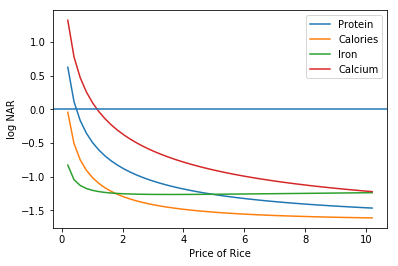

In [59]:
fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % USE_GOOD)


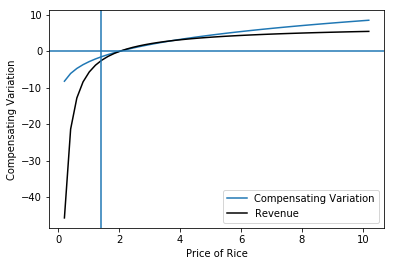

In [60]:
fig, ax1 = plt.subplots()

ax1.plot(P,[compensating_variation(U0,p,my_prices(p0)) for p0 in P])
ax1.set_xlabel("Price of %s" % USE_GOOD)
ax1.set_ylabel("Compensating Variation")

ax1.plot(P,[revenue(U0,p,my_prices(p0)) for p0 in P],'k')
ax1.legend(('Compensating Variation','Revenue'))
ax1.axhline(0)
ax1.axvline(p.loc[USE_GOOD])

#CV is more negative as the price gets smaller

#demand is very inelastic in that range that CV is almost the same as Revenue, ie when price is 2- 5 dollars, and the
#policy can work for this range.
